In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_task2.csv to dataset_task2.csv


**Part 1**

In [ ]:
df=pd.read_csv('dataset_task2.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**1.Exploratory Data Analysis (EDA)**

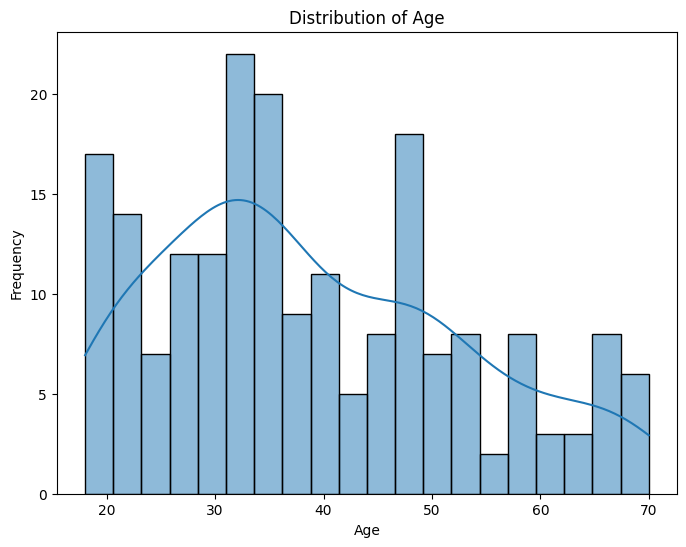

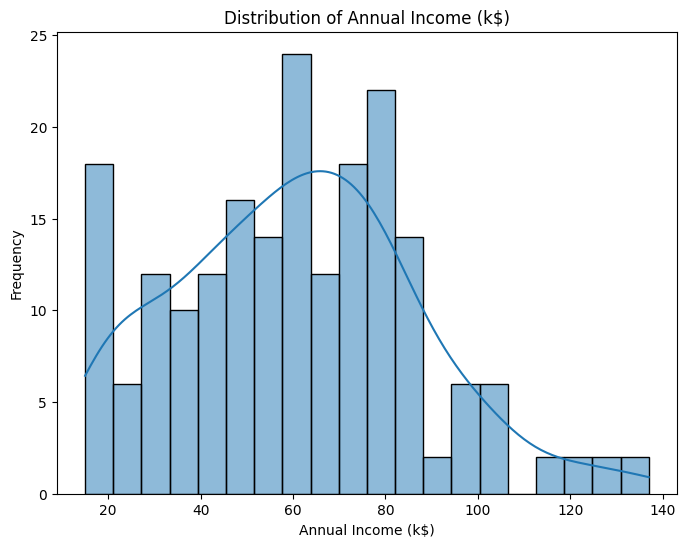

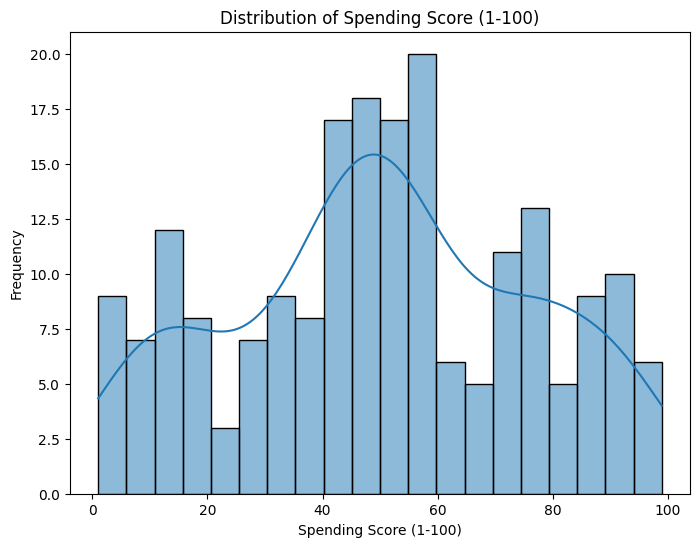

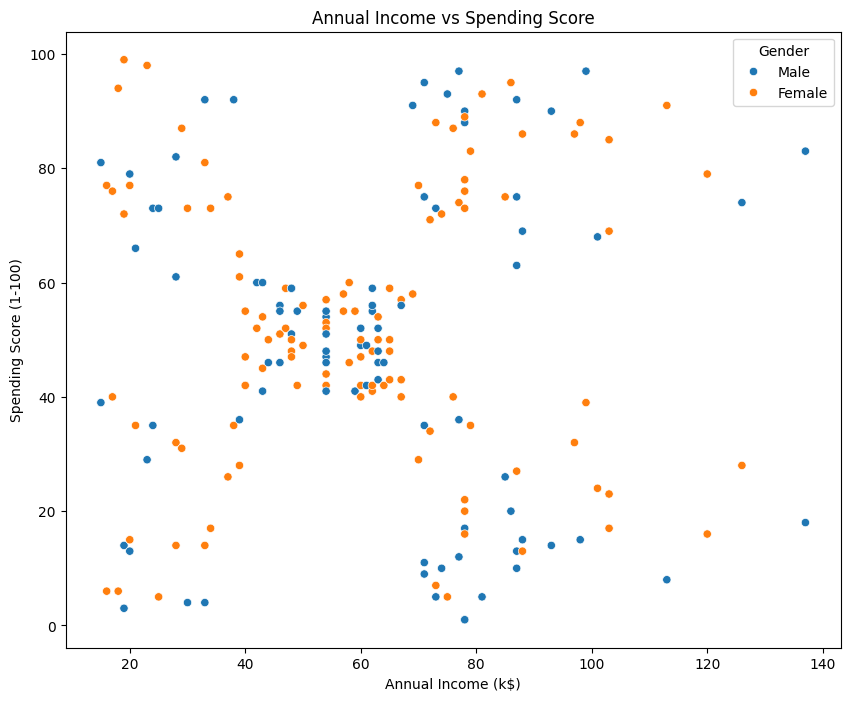

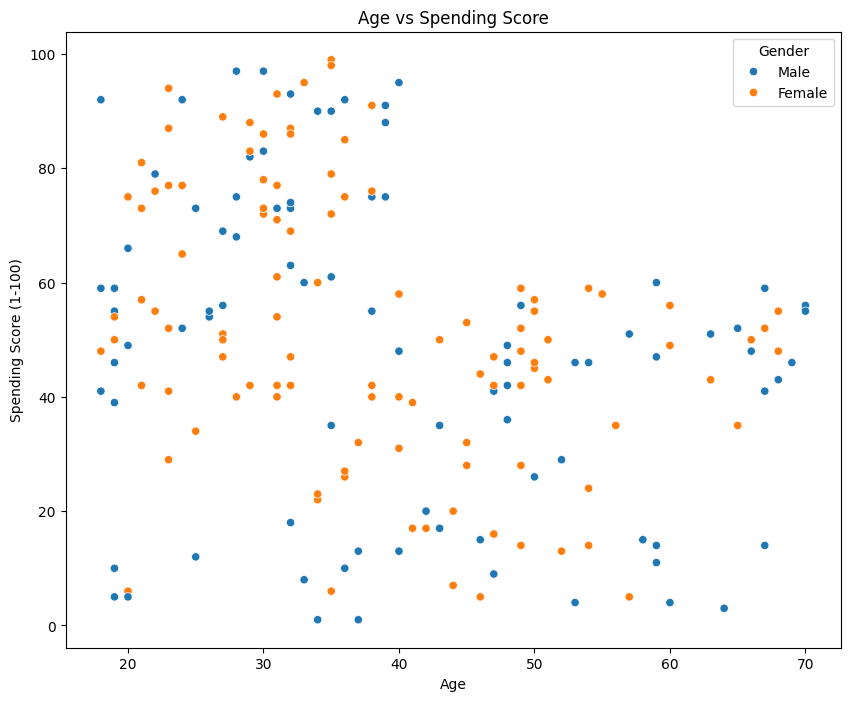

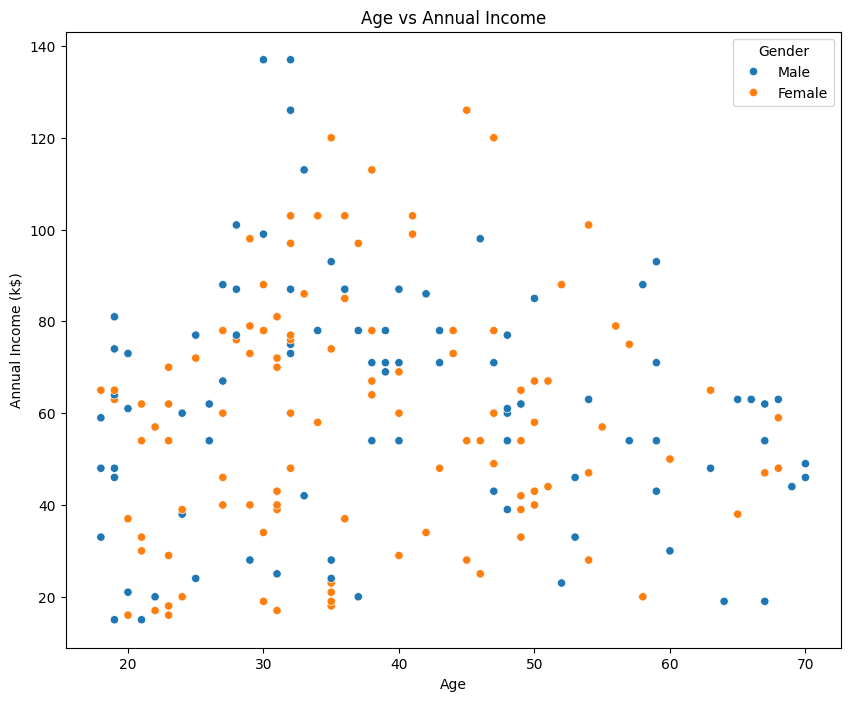

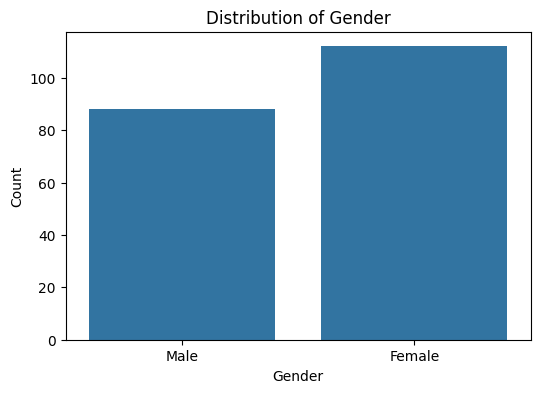

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender',data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)',hue='Gender',data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Annual Income (k$)',hue='Gender',data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**2.Feature Encoding**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
display(df_encoded.head())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


**3.Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])

df_scaled = pd.DataFrame(df_scaled, columns=features)
display(df_scaled.head())

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


**4.PCA(Principal Component Analysis)**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
pca = PCA(n_components=2) # You can choose the number of components
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['Principal Component 1', 'Principal Component 2'])

display(df_pca.head())

# Display explained variance ratio
print("\nExplained Variance Ratio:") # This array tells us how much of the total variance (spread) in the original data is captured by each principal component.
# It tells that PC1 captures 44.2% Variance in the features and PC2 captures 33.3% variance in features
print(pca.explained_variance_ratio_)

print("\nComponent Loadings:") # these tables show the correlation between original features and principal componenets
print(pd.DataFrame(pca.components_, columns=df_scaled.columns, index=['Principal Component 1', 'Principal Component 2']))

,Principal Component 1,Principal Component 2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740



Explained Variance Ratio:
[0.44266167 0.33308378]

Component Loadings:
                            Age  Annual Income (k$)  Spending Score (1-100)
Principal Component 1  0.706382           -0.048024               -0.706199
Principal Component 2  0.030141            0.998832               -0.037775


Text(0.5, 1.0, 'PCA Scatter Plot')

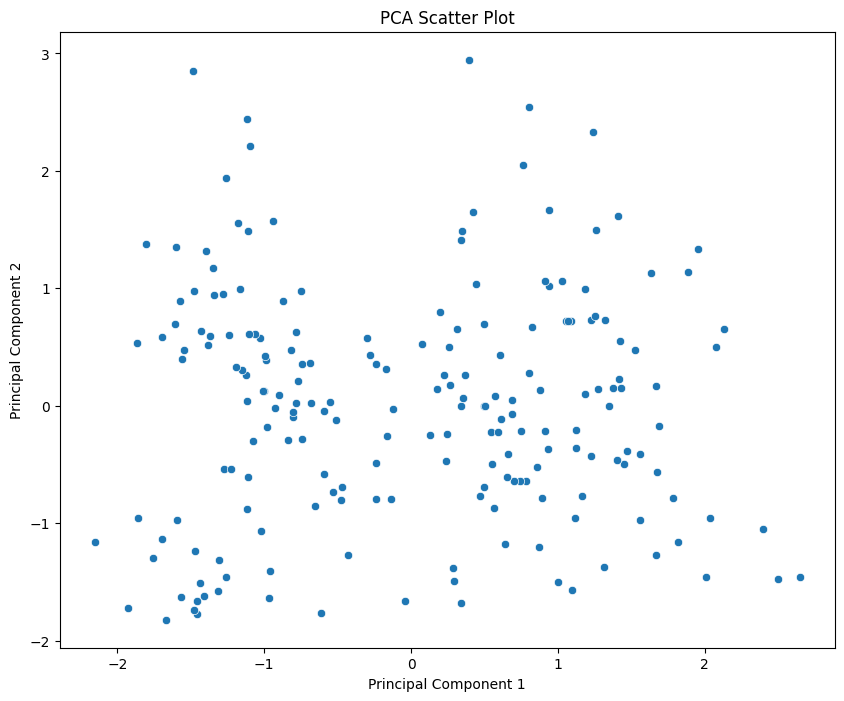

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_pca)
plt.title('PCA Scatter Plot')

**5.Clustering Techniques**

In [ ]:
# Clustering techniques are unsupervised machine learning methods used to group data points into clusters based on their similarity.

**1.K-means Clustering**

In [ ]:
# Step 1: Choose the number of clusters K.
# Step 2: Initialize K centroids by randomly selecting K data points as initial cluster centers.
# Step 3: Assign each data point to the nearest centroid forming K clusters. The nearest is typically determined using Euclidean distance but other distance metrics can be used.
# Step 4: Recalculate the centroids of each cluster by taking the mean of all data points assigned to that cluster.
# Step 5: Repeat steps 3 and 4 until the centroids no longer move significantly or a maximum number of iterations is reached. This indicates that the clusters have converged.

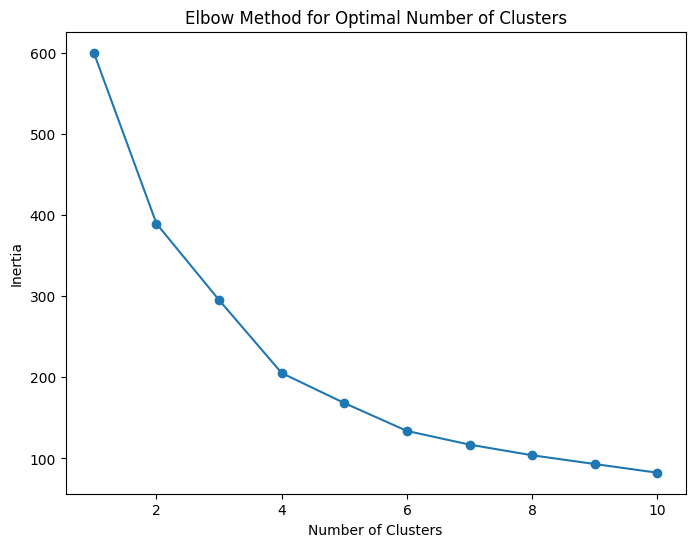

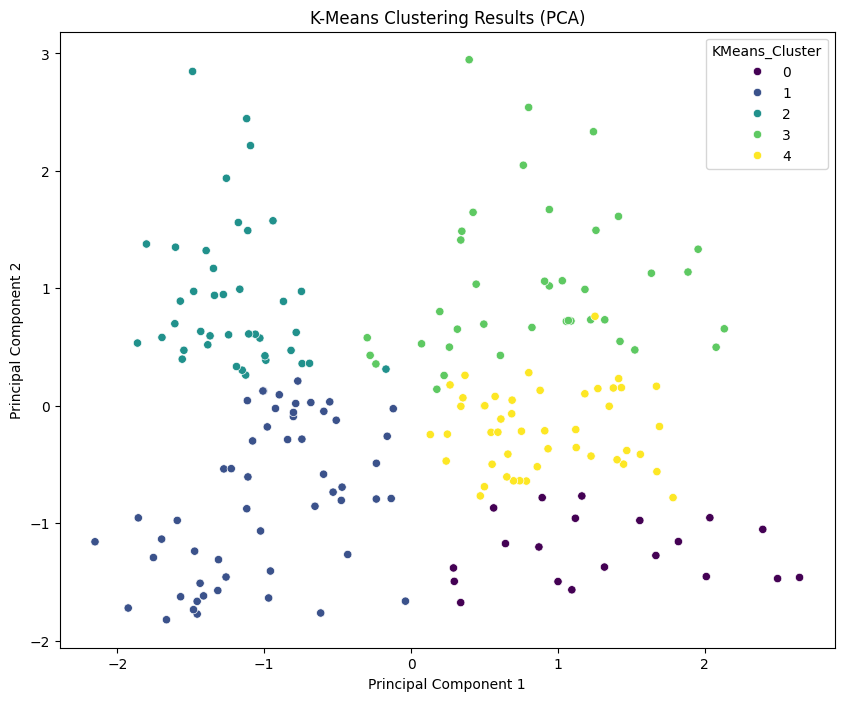

Silhouette Score: 0.41664341513732767
Davies-Bouldin Index (DBI): 0.874551051002418
Calinski-Harabasz (CH) Score: 125.10094020060954

Cluster Analysis:
                      Age  Annual_Income_k  Spending_Score  Gender  Count
KMeans_Cluster                                                           
0               46.250000        26.750000       18.350000  Female     20
1               25.185185        41.092593       62.240741  Female     54
2               32.875000        86.100000       81.525000  Female     40
3               39.871795        86.102564       19.358974    Male     39
4               55.638298        54.382979       48.851064  Female     47


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Determine the optimal number of clusters using the Elbow Method
# Elbow method is used to determine the optimal number of clusters K
# In elbow method we run K-Means for different numbers of clusters and then we calculate inertia
# The plot of inertia versus the number of clusters shows an elbow point which is often considered a good estimation for K
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init added to suppress warning
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, let's choose a number of clusters (e.g., 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init added
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe and the PCA dataframe
df['KMeans_Cluster'] = clusters
df_pca['KMeans_Cluster'] = clusters

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='KMeans_Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_avg = silhouette_score(df_scaled, clusters)
dbi_score = davies_bouldin_score(df_scaled, clusters)
ch_score = calinski_harabasz_score(df_scaled, clusters)


print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index (DBI): {dbi_score}") # Lower values indicate better clustering
print(f"Calinski-Harabasz (CH) Score: {ch_score}") # Higher values indicate better clustering


# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('KMeans_Cluster').agg(
    Age=('Age', 'mean'),
    Annual_Income_k=('Annual Income (k$)', 'mean'),
    Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
    Count=('Gender', 'count') # Use gender to count the number of customers in each cluster
)
print("\nCluster Analysis:")
print(cluster_analysis)

**2.Hierarchical clusterring**

In [ ]:
# Hierarchical clustering is often associated with heatmaps and heatmaps often comes with dendograms
# Hierarchical clustering orders the rows and the columns based on similarity
# Hierarchical clustering has two approach:
#1.Agglomerative Approach:Starts with each point as its own clusterand merges it step by step based on Similarity
#2.Divisive Approach:Starts with one large cluster and recursively splits it into smaller clusters

In [ ]:
# dendogram: A tree-like diagram used to visualize the merging or splitting process and decide the number of clusters
# In this hierarchical clustering we measure distances between datapoints or clusters using the euclidean distance in order for pairing datapoints and forming clusters
# Here like K-Means you don't need to predefine the number of clusters.

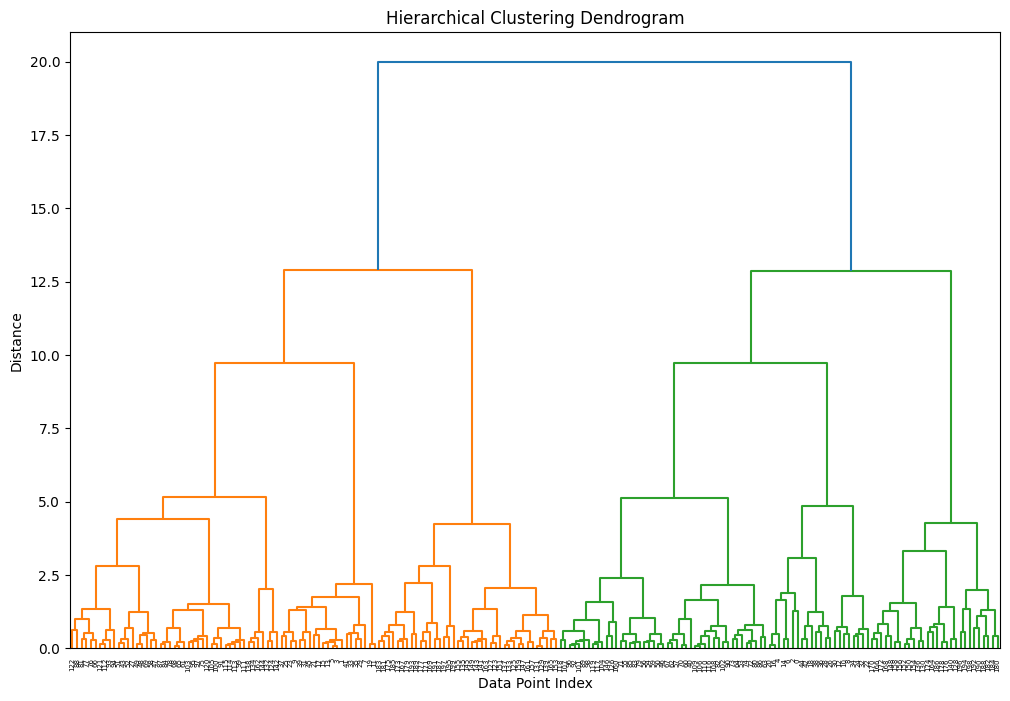

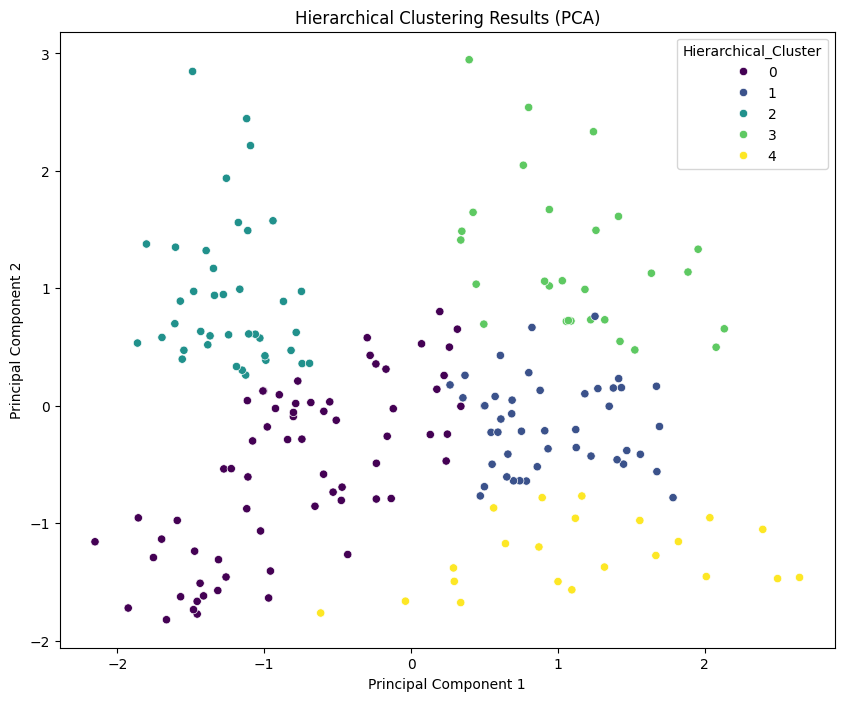

Silhouette Score (Hierarchical Clustering): 0.39002826186267214
Davies-Bouldin Index (DBI) (Hierarchical Clustering): 0.9162886109753661
Calinski-Harabasz (CH) Score (Hierarchical Clustering): 107.82656032570374

Cluster Analysis (Hierarchical Clustering):


,Age,Annual_Income_k,Spending_Score,Gender,Count
Hierarchical_Cluster,,,,,
0,26.560606,47.363636,56.787879,Female,66
1,56.400000,55.288889,48.355556,Female,45
2,32.692308,86.538462,82.128205,Female,39
3,43.892857,91.285714,16.678571,Female,28
4,44.318182,25.772727,20.272727,Female,22


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

data_for_clustering = df_scaled

# Generate the linkage matrix (hierarchical clustering)
linked = linkage(data_for_clustering, method='ward') # 'ward' minimizes the variance of the clusters being merged

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            labels=df.index.tolist(), # Use original DataFrame index as labels
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the number of clusters (e.g., if you cut at a certain height)
# For demonstration, let's choose 5 clusters based on the previous K-Means result
n_clusters_hierarchical = 5
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
clusters_hierarchical = hierarchical_cluster.fit_predict(data_for_clustering)

# Add the cluster labels to the original dataframe and the PCA dataframe
df['Hierarchical_Cluster'] = clusters_hierarchical
df_pca['Hierarchical_Cluster'] = clusters_hierarchical

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Hierarchical_Cluster', data=df_pca, palette='viridis')
plt.title('Hierarchical Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_avg_hierarchical = silhouette_score(data_for_clustering, clusters_hierarchical)
dbi_score_hierarchical = davies_bouldin_score(data_for_clustering, clusters_hierarchical)
ch_score_hierarchical = calinski_harabasz_score(data_for_clustering, clusters_hierarchical)

print(f"Silhouette Score (Hierarchical Clustering): {silhouette_avg_hierarchical}")
print(f"Davies-Bouldin Index (DBI) (Hierarchical Clustering): {dbi_score_hierarchical}")
print(f"Calinski-Harabasz (CH) Score (Hierarchical Clustering): {ch_score_hierarchical}")

# Analyze the characteristics of each cluster
cluster_analysis_hierarchical = df.groupby('Hierarchical_Cluster').agg(
    Age=('Age', 'mean'),
    Annual_Income_k=('Annual Income (k$)', 'mean'),
    Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
    Count=('Gender', 'count') # Use gender to count the number of customers in each cluster
)
print("\nCluster Analysis (Hierarchical Clustering):")
display(cluster_analysis_hierarchical)

**3.DBSCAN Clustering**

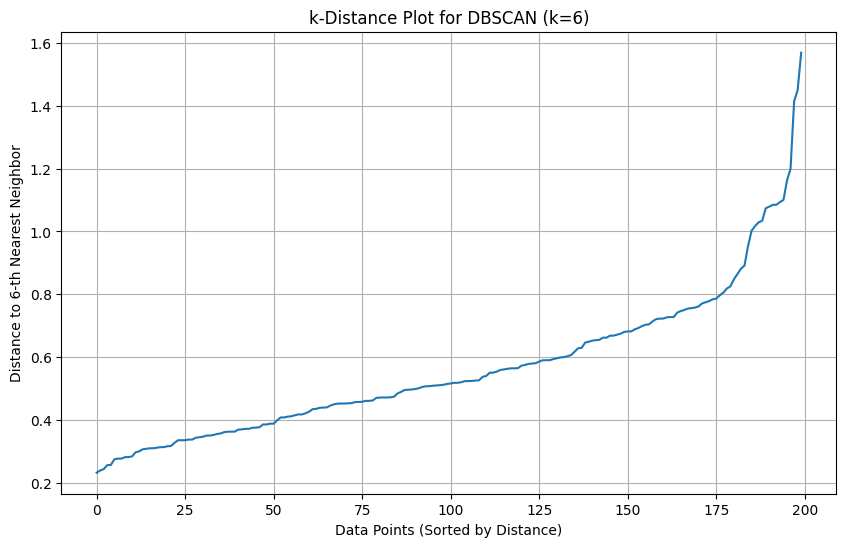

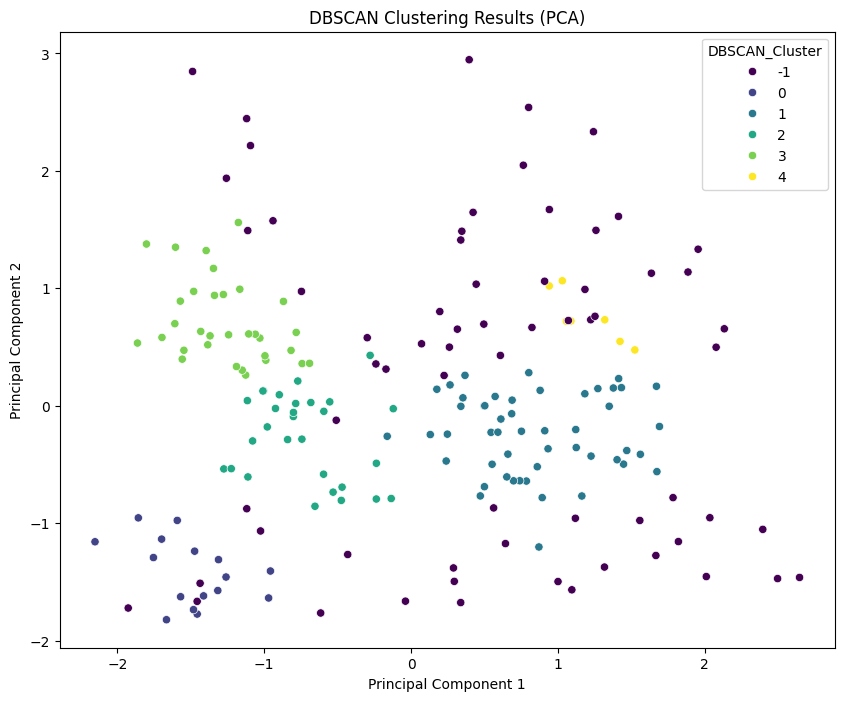

Silhouette Score (DBSCAN - excluding noise): 0.5277669573360695
Davies-Bouldin Index (DBI) (DBSCAN - excluding noise): 0.6043424399107536
Calinski-Harabasz (CH) Score (DBSCAN - excluding noise): 144.37875083043343

Cluster Analysis (DBSCAN - excluding noise):


,Age,Annual_Income_k,Spending_Score,Gender,Count
DBSCAN_Cluster,,,,,
0,23.375000,25.312500,78.500000,Female,16
1,54.240000,53.260000,48.380000,Female,50
2,24.379310,54.517241,50.172414,Female,29
3,32.750000,80.875000,83.625000,Female,32
4,43.857143,78.714286,14.571429,Male,7



Number of noise points (outliers): 66


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the scaled data for clustering
data_for_clustering = df_scaled

# Determine the optimal eps using the k-distance plot
# Set k (min_samples) - typically this is set to 2 * dimensions of your data, or based on domain knowledge
min_samples = 2 * data_for_clustering.shape[1] # Using 2 * number of features as a common heuristic

# Calculate the distance to the k-th nearest neighbor for each point
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(data_for_clustering)
distances, indices = nbrs.kneighbors(data_for_clustering)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'k-Distance Plot for DBSCAN (k={min_samples})')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor')
plt.grid(True)
plt.show()

# Based on the elbow in the k-distance plot, choose an appropriate value for eps.
# Replace the placeholder value with the value you visually determine from the plot.
# For demonstration, let's use a placeholder value. You should adjust this based on the plot.
# Example: If the elbow is around 0.5, set eps = 0.5
eps_value = 0.5 # <--- **Adjust this value based on the elbow in the plot**

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(data_for_clustering)

# Add the cluster labels to the original dataframe and the PCA dataframe
df['DBSCAN_Cluster'] = clusters_dbscan
df_pca['DBSCAN_Cluster'] = clusters_dbscan  # Add cluster labels to df_pca

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='DBSCAN_Cluster', data=df_pca, palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score (excluding noise points with label -1)
unique_labels = set(clusters_dbscan)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)

if n_clusters_dbscan >= 2:
    # Filter out noise points for metric calculations
    non_noise_indices = clusters_dbscan != -1
    data_non_noise = data_for_clustering[non_noise_indices]
    clusters_non_noise = clusters_dbscan[non_noise_indices]

    # Ensure there are at least two clusters among the non-noise points
    if len(set(clusters_non_noise)) >= 2:
        silhouette_avg_dbscan = silhouette_score(data_non_noise, clusters_non_noise)
        dbi_score_dbscan = davies_bouldin_score(data_non_noise, clusters_non_noise)
        ch_score_dbscan = calinski_harabasz_score(data_non_noise, clusters_non_noise)

        print(f"Silhouette Score (DBSCAN - excluding noise): {silhouette_avg_dbscan}")
        print(f"Davies-Bouldin Index (DBI) (DBSCAN - excluding noise): {dbi_score_dbscan}")
        print(f"Calinski-Harabasz (CH) Score (DBSCAN - excluding noise): {ch_score_dbscan}")
    else:
         print("DBSCAN found less than 2 clusters among non-noise points, Silhouette, DBI, and CH Scores are not applicable.")

else:
    print("DBSCAN found less than 2 clusters (excluding noise points), Silhouette, DBI, and CH Scores are not applicable.")


# Analyze the characteristics of each cluster (excluding noise points)
cluster_analysis_dbscan = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').agg(
    Age=('Age', 'mean'),
    Annual_Income_k=('Annual Income (k$)', 'mean'),
    Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
    Count=('Gender', 'count')
)
print("\nCluster Analysis (DBSCAN - excluding noise):")
display(cluster_analysis_dbscan)

# Analyze the noise points
noise_points_count = (clusters_dbscan == -1).sum()
print(f"\nNumber of noise points (outliers): {noise_points_count}")

**4.HDBSCAN Clustering**

In [ ]:
# HDBSCAN can find out similar groups even in messy data and we did not need to specify it how many clusters it should expect
# Its finds out dense areas and calls them clusters
# It ignores lonely points and calls them noise
# It can too handle different size clusters

In [ ]:
# Step 1: It finds the Mutual reachability distance between two  data points and then finds out the dense and the sparse areas
# Step 2: Connects all data points according to MRD and then creates a Web that links all the data points with the shortest total distance
# Step 3: Now it creates a tree of clusters by gradually removing longest edges,as edges disappear the graph breaks down into smaller pieces forming potiential clusters.
# Step 4: From this tree, HDBSCAN picks clusters that stay together the longest
# Step 5: These are called stable clusters they’re not just random blobs, they’re consistent groups
# Step 6: Points that don’t fit into any stable cluster are labeled as noise or outliers (cluster -1)

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_

DBCV scores for different min_cluster_size values:
min_cluster_size: 5, DBCV: 0.24219254312900362
min_cluster_size: 10, DBCV: 0.17890674587105196
min_cluster_size: 15, DBCV: 0.09764659122147978
min_cluster_size: 20, DBCV: 0.07800208830692426

Optimal min_cluster_size based on DBCV: 5


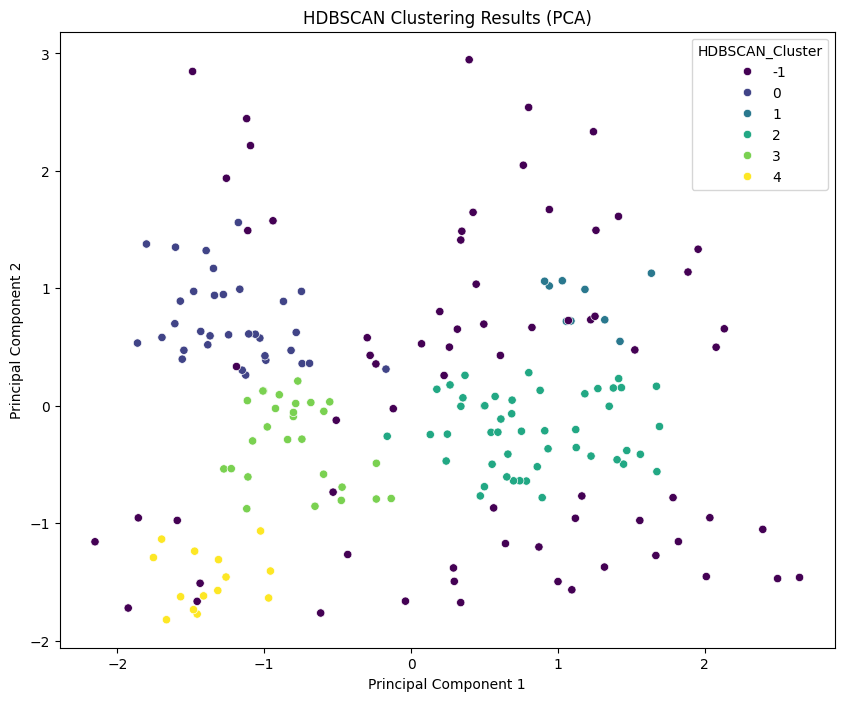

Silhouette Score (HDBSCAN - excluding noise): 0.5315262311208284
Davies-Bouldin Index (DBI) (HDBSCAN - excluding noise): 0.6108519025273427
Calinski-Harabasz (CH) Score (HDBSCAN - excluding noise): 146.84787643563502

Cluster Analysis (HDBSCAN - excluding noise):


,Age,Annual_Income_k,Spending_Score,Gender,Count
HDBSCAN_Cluster,,,,,
0,32.727273,81.000000,81.878788,Female,33
1,44.222222,82.222222,15.777778,Male,9
2,54.541667,54.083333,49.145833,Female,48
3,23.740741,53.555556,51.259259,Female,27
4,24.428571,23.642857,76.428571,Female,14



Number of noise points (outliers): 69


In [ ]:
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # Import DBI and CH Score
from hdbscan.validity import validity_index # Import DBCV

data_for_clustering = df_scaled

# Tune min_cluster_size and evaluate using DBCV
min_cluster_sizes = range(5, 21, 5) # Example range of min_cluster_size values to try
dbcv_scores = []

for min_size in min_cluster_sizes:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size)
    hdbscan_clusterer.fit(data_for_clustering)
    clusters_hdbscan = hdbscan_clusterer.labels_

    # Calculate DBCV score, handling cases with only one cluster or no points
    unique_labels = set(clusters_hdbscan)
    n_clusters_hdbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)

    if n_clusters_hdbscan >= 2:
        # Ensure there are enough points for DBCV calculation (at least 2 clusters and more than 1 point per cluster)
        # Also ensure there are non-noise points before calculating DBCV
        if np.sum(clusters_hdbscan != -1) > 1 and all(np.sum(clusters_hdbscan == label) > 1 for label in unique_labels if label != -1):
            # Convert data to NumPy array before passing to validity_index
            dbcv = validity_index(data_for_clustering.values, clusters_hdbscan)
            dbcv_scores.append((min_size, dbcv))
        else:
            dbcv_scores.append((min_size, -1)) # Append -1 if conditions for DBCV are not met
    else:
        dbcv_scores.append((min_size, -1)) # Append -1 if less than 2 clusters found (excluding noise)

# Print DBCV scores for different min_cluster_size values
print("DBCV scores for different min_cluster_size values:")
for min_size, dbcv in dbcv_scores:
    print(f"min_cluster_size: {min_size}, DBCV: {dbcv}")

# Choose the min_cluster_size that maximizes the DBCV score (if multiple clusters were found and valid DBCV scores were computed)
best_min_size = None
max_dbcv = -np.inf

# Find the maximum valid DBCV score and its corresponding min_size
valid_dbcv_scores = [(min_size, dbcv) for min_size, dbcv in dbcv_scores if dbcv != -1]

if valid_dbcv_scores:
    best_min_size, max_dbcv = max(valid_dbcv_scores, key=lambda item: item[1])
    print(f"\nOptimal min_cluster_size based on DBCV: {best_min_size}")
else:
    # If no valid DBCV scores were computed, fall back to the first min_cluster_size
    best_min_size = min_cluster_sizes[0]
    print(f"\nNo valid DBCV scores computed. Using the first min_cluster_size: {best_min_size}")


# Apply HDBSCAN with the chosen min_cluster_size
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=best_min_size)
hdbscan_clusterer.fit(data_for_clustering)
clusters_hdbscan = hdbscan_clusterer.labels_

# Add the cluster labels to the original dataframe and the PCA dataframe
df['HDBSCAN_Cluster'] = clusters_hdbscan
df_pca['HDBSCAN_Cluster'] = clusters_hdbscan  # Add cluster labels to df_pca

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='HDBSCAN_Cluster', data=df_pca, palette='viridis', legend='full')
plt.title('HDBSCAN Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score (excluding noise points with label -1)
unique_labels = set(clusters_hdbscan)
n_clusters_hdbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)

if n_clusters_hdbscan >= 2:
    # Filter out noise points for metric calculations
    non_noise_indices = clusters_hdbscan != -1
    data_non_noise = data_for_clustering[non_noise_indices]
    clusters_non_noise = clusters_hdbscan[non_noise_indices]

    # Ensure there are at least two clusters among the non-noise points
    if len(set(clusters_non_noise)) >= 2:
        silhouette_avg_hdbscan = silhouette_score(data_non_noise, clusters_non_noise)
        dbi_score_hdbscan = davies_bouldin_score(data_non_noise, clusters_non_noise)
        ch_score_hdbscan = calinski_harabasz_score(data_non_noise, clusters_non_noise)

        print(f"Silhouette Score (HDBSCAN - excluding noise): {silhouette_avg_hdbscan}")
        print(f"Davies-Bouldin Index (DBI) (HDBSCAN - excluding noise): {dbi_score_hdbscan}")
        print(f"Calinski-Harabasz (CH) Score (HDBSCAN - excluding noise): {ch_score_hdbscan}")
    else:
        print("HDBSCAN found less than 2 clusters among non-noise points, Silhouette, DBI, and CH Scores are not applicable.")
else:
    print("HDBSCAN found less than 2 clusters (excluding noise points), Silhouette, DBI, and CH Scores are not applicable.")

# Analyze the characteristics of each cluster (excluding noise points)
cluster_analysis_hdbscan = df[df['HDBSCAN_Cluster'] != -1].groupby('HDBSCAN_Cluster').agg(
    Age=('Age', 'mean'),
    Annual_Income_k=('Annual Income (k$)', 'mean'),
    Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
    Count=('Gender', 'count')
)
print("\nCluster Analysis (HDBSCAN - excluding noise):")
display(cluster_analysis_hdbscan)

# Analyze the noise points
noise_points_count = (clusters_hdbscan == -1).sum()
print(f"\nNumber of noise points (outliers): {noise_points_count}")

**6. Cluster Profiling and Persona Creation (using HDBSCAN)**

In [ ]:
# We'll use the cluster_analysis_hdbscan DataFrame generated in the previous step
display(cluster_analysis_hdbscan)

,Age,Annual_Income_k,Spending_Score,Gender,Count
HDBSCAN_Cluster,,,,,
0,32.727273,81.000000,81.878788,Female,33
1,44.222222,82.222222,15.777778,Male,9
2,54.541667,54.083333,49.145833,Female,48
3,23.740741,53.555556,51.259259,Female,27
4,24.428571,23.642857,76.428571,Female,14


Now, let's visualize the differences in central tendencies across the HDBSCAN clusters.

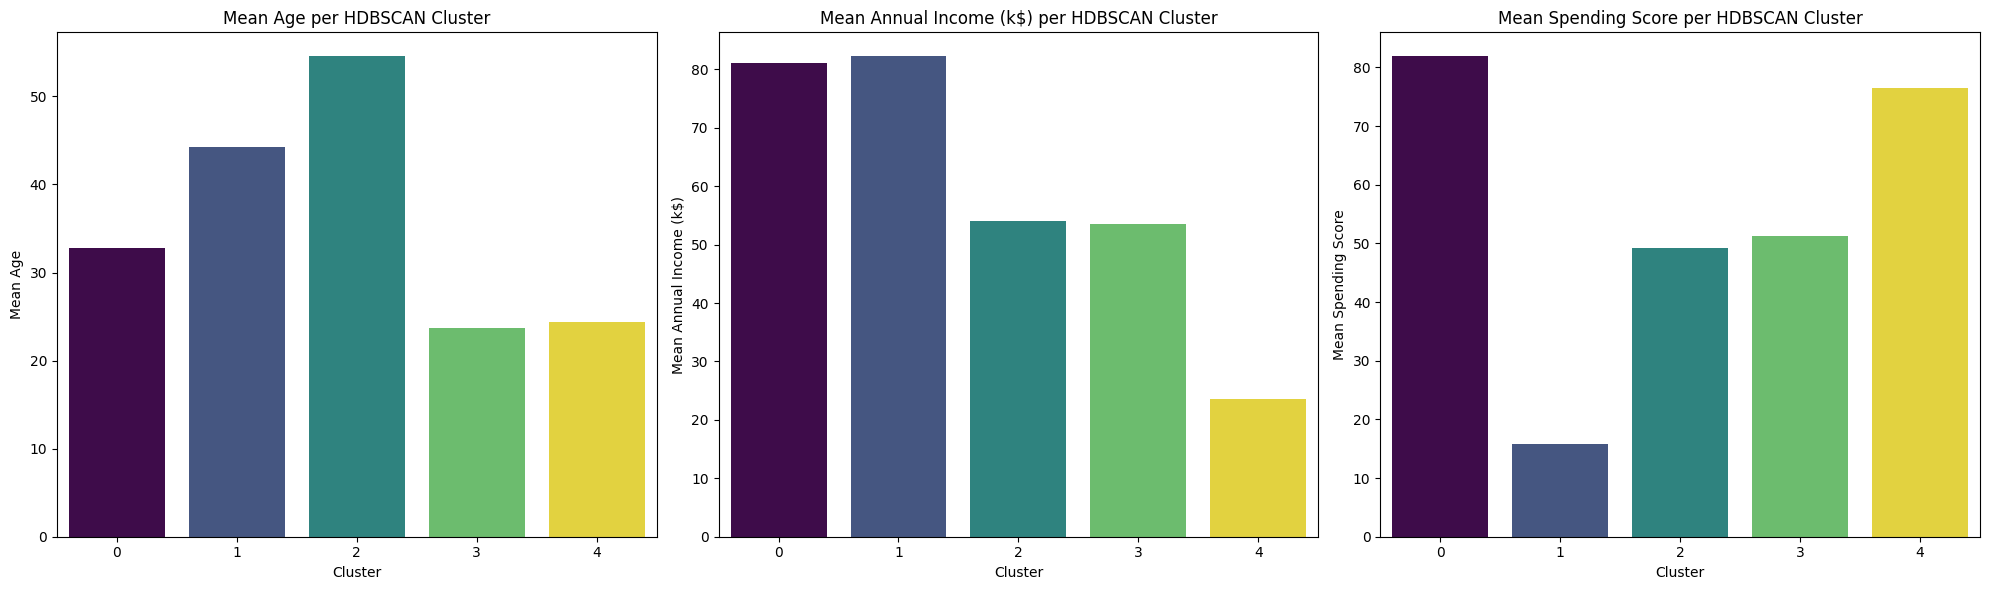

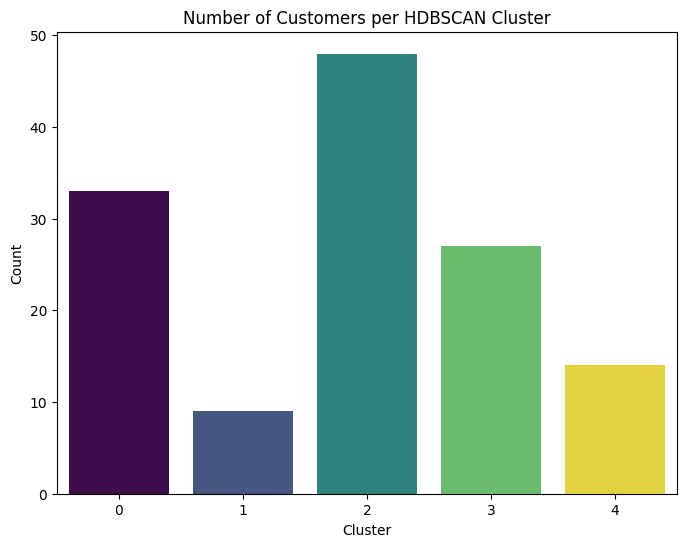


Mode Gender per HDBSCAN Cluster:


,Gender
HDBSCAN_Cluster,
0,Female
1,Male
2,Female
3,Female
4,Female


In [ ]:
# Visualize the mean Age, Annual Income, and Spending Score for each cluster

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Plot Mean Age per Cluster
sns.barplot(x=cluster_analysis_hdbscan.index, y='Age', data=cluster_analysis_hdbscan, ax=axes[0], palette='viridis', hue=cluster_analysis_hdbscan.index, legend=False)
axes[0].set_title('Mean Age per HDBSCAN Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Mean Age')

# Plot Mean Annual Income per Cluster
sns.barplot(x=cluster_analysis_hdbscan.index, y='Annual_Income_k', data=cluster_analysis_hdbscan, ax=axes[1], palette='viridis', hue=cluster_analysis_hdbscan.index, legend=False)
axes[1].set_title('Mean Annual Income (k$) per HDBSCAN Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Mean Annual Income (k$)')

# Plot Mean Spending Score per Cluster
sns.barplot(x=cluster_analysis_hdbscan.index, y='Spending_Score', data=cluster_analysis_hdbscan, ax=axes[2], palette='viridis', hue=cluster_analysis_hdbscan.index, legend=False)
axes[2].set_title('Mean Spending Score per HDBSCAN Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Mean Spending Score')

plt.tight_layout()
plt.show()

# Visualize the count of customers in each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_analysis_hdbscan.index, y='Count', data=cluster_analysis_hdbscan, palette='viridis', hue=cluster_analysis_hdbscan.index, legend=False)
plt.title('Number of Customers per HDBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Visualize the Gender distribution within each cluster (using the mode Gender from the analysis)
# Since the mode gender is already calculated, we can just display it
print("\nMode Gender per HDBSCAN Cluster:")
display(cluster_analysis_hdbscan['Gender'])

Based on the cluster analysis and visualizations, we can create descriptive personas for each HDBSCAN cluster:

* **Cluster 0: High-Spending Young Professionals**
    * **Age:** Around 33 years old
    * **Annual Income (k$):** Approximately 81
    * **Spending Score (1-100):** Around 82 (high)
    * **Gender:** Predominantly Female
    * **Count:** 33 customers
    * **Persona:** This group consists of relatively young professionals, mostly female, who have a high annual income and a very high spending score. They are likely engaged and enthusiastic shoppers.

* **Cluster 1: Cautious High-Income Males**
    * **Age:** Around 44 years old
    * **Annual Income (k$):** Approximately 82
    * **Spending Score (1-100):** Around 16 (low)
    * **Gender:** Predominantly Male
    * **Count:** 9 customers
    * **Persona:** This is a smaller group of middle-aged males with high annual income but a very low spending score. They are likely cautious spenders or perhaps have other financial priorities.

* **Cluster 2: Average-Spending Older Females**
    * **Age:** Around 55 years old
    * **Annual Income (k$):** Approximately 54
    * **Spending Score (1-100):** Around 49 (average)
    * **Gender:** Predominantly Female
    * **Count:** 48 customers
    * **Persona:** This is a large group of older females with average annual income and average spending scores. They represent a stable customer base with moderate spending habits.

* **Cluster 3: Average-Spending Young Females**
    * **Age:** Around 24 years old
    * **Annual Income (k$):** Approximately 54
    * **Spending Score (1-100):** Around 51 (average)
    * **Gender:** Predominantly Female
    * **Count:** 27 customers
    * **Persona:** This group consists of young females with average annual income and average spending scores. They are likely students or those in the early stages of their careers with moderate spending habits.

* **Cluster 4: Low-Spending Younger Females**
    * **Age:** Around 24 years old
    * **Annual Income (k$):** Approximately 24
    * **Spending Score (1-100):** Around 76 (high)
    * **Gender:** Predominantly Female
    * **Count:** 14 customers
    * **Persona:** This is a smaller group of young females with low annual income but high spending scores. They might be students or young professionals who are more focused on spending despite their lower income.

Remember that these personas are based on the central tendencies of the clusters. You can further refine them by looking at the distribution of features within each cluster if needed.

**Part-2**

**1.make_blobs**

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3) # n_features=3 as make_blobs creates data points based on the numerical features rather than categorical features

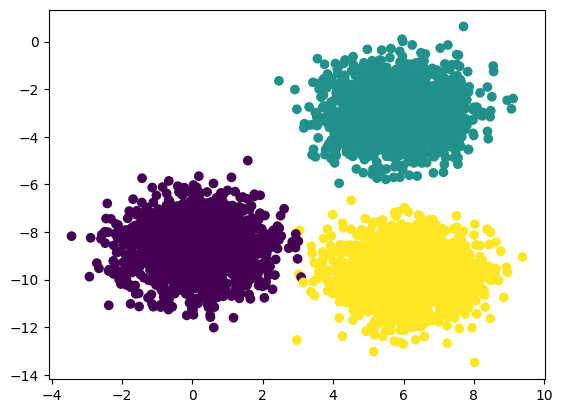

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1]) # here make_blob returns us a tuple that is df_syn that has two main element the first element df_syn[0] holds the synthetic datapoints that were generated that has both rows and column and the second element that is df_syn[1] holds the theb information of which cluster those datapoints belong too

In [ ]:
df_syn[0]

array([[  5.46340878, -11.11605255,  -6.53705874],
       [  4.63143849,  -2.49158032,  -8.7929271 ],
       [  1.07593077,  -8.73222362,   7.40624086],
       ...,
       [  0.53058878, -10.77409627,   5.90810128],
       [  7.59142518,  -8.95360462,  -8.54701389],
       [  6.25224341,  -8.98585721,  -7.86110326]])

**2.make_moons**

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
df_syn1=make_moons()

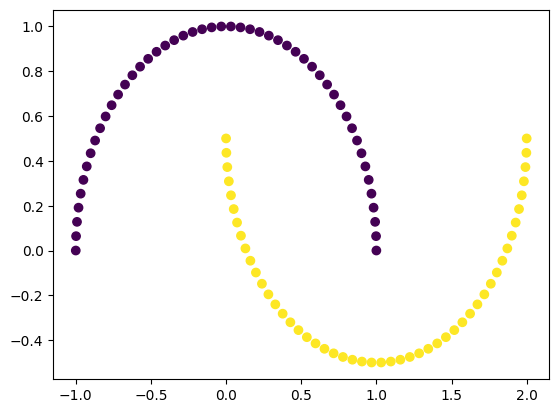

In [ ]:
plt.scatter(df_syn1[0][:,0],df_syn1[0][:,1],c=df_syn1[1])

**make_blobs Parameters**

**1.centers**

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,centers=3) # It is used to create new clusters depending on the number centers we give in the centers parameter, as no.of centers increases the number of clusters also increases

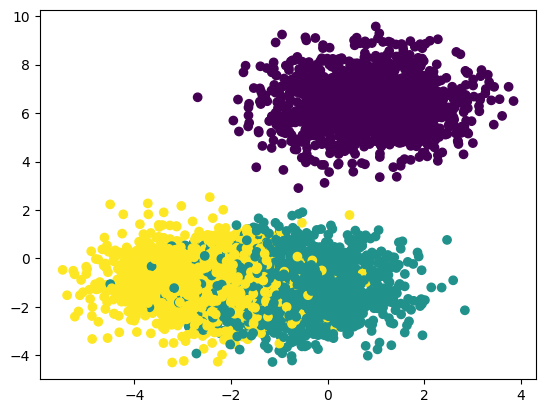

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,centers=4)

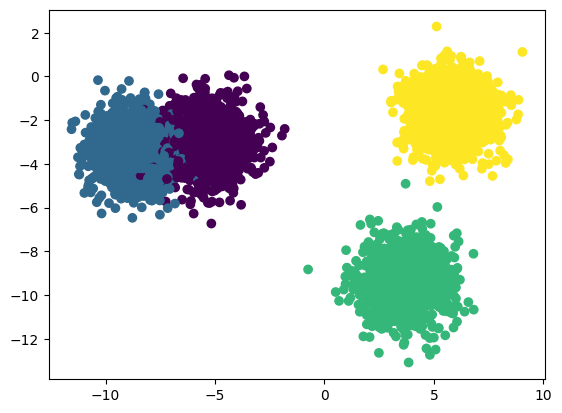

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,centers=5)

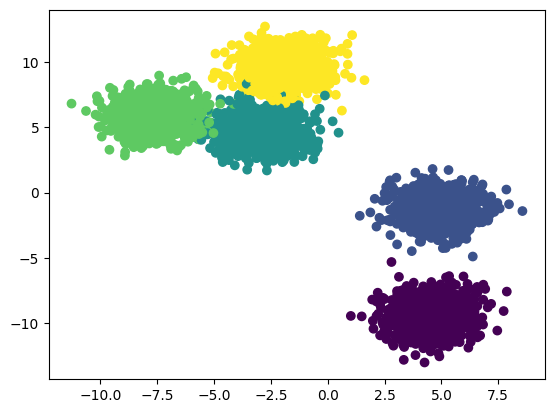

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

**2.cluster_std**

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,cluster_std=1)

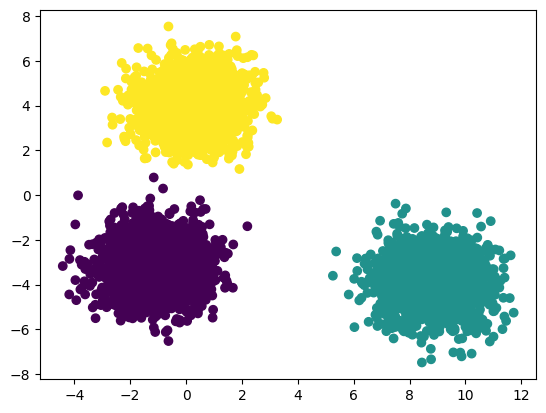

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,cluster_std=2) # cluster_std decreases the spread between clusters as the its number increases the clusters start coming more closer together

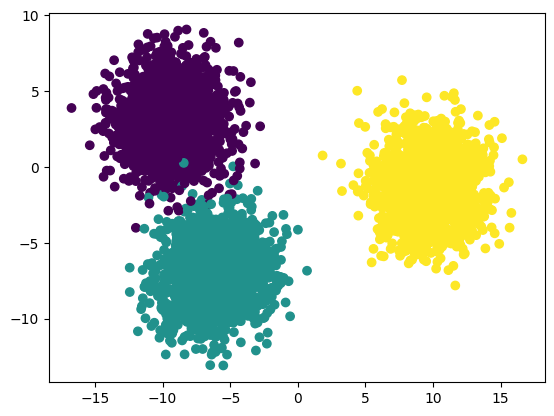

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,cluster_std=3)

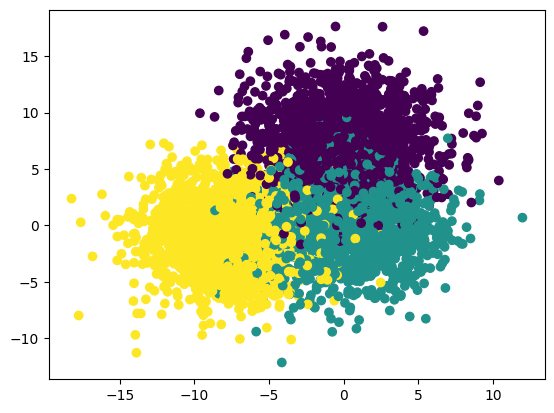

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,cluster_std=5)

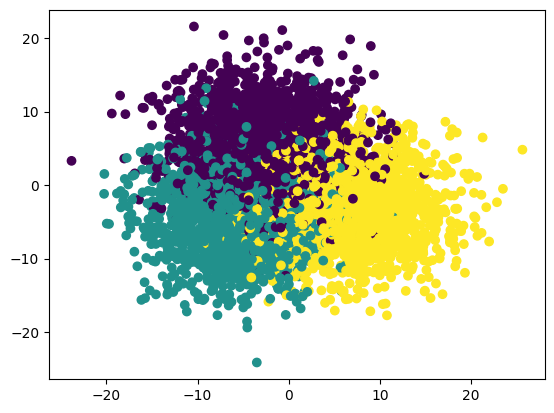

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

**3.random_state**

In [ ]:
df_syn=make_blobs(n_samples=5000,n_features=3,cluster_std=5,random_state=42) # if we set the random_state then we can get same synthetic data or sample everytime by just putting the same value of random_state

**4.return_centers**

In [ ]:
df_syn, labels, centers = make_blobs(n_samples=5000,n_features=3,cluster_std=5,return_centers=True,centers=5) # returns coordinates of the centers of the cluster

In [ ]:
centers

array([[-3.07011345, -8.20157637,  9.45910826],
       [-5.0931347 , -6.45226886,  8.5491784 ],
       [ 4.83912028,  3.35628938,  1.92670478],
       [ 8.64473235,  8.94678353,  7.51604089],
       [ 9.76237348,  4.75259282,  4.87913044]])

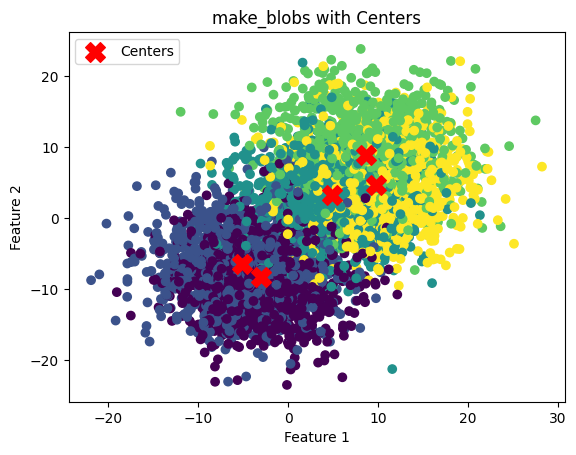

In [ ]:
plt.scatter(df_syn[:,0],df_syn[:,1],c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='X', color='red', s=200, label='Centers')
plt.title('make_blobs with Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**5.shuffle**

In [ ]:
df_syn, labels, centers = make_blobs(n_samples=5000,n_features=3,cluster_std=5,return_centers=True,centers=5,shuffle=False) # the shuffle parameter ensures whether data is shuffled or not if its true you get evry time random data and if it is false you get the same data

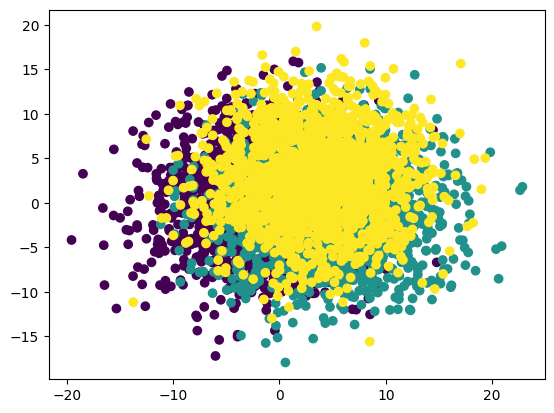

In [ ]:
plt.scatter(df_syn[0][:,0],df_syn[0][:,1],c=df_syn[1])

In [ ]:
df_syn, labels, centers = make_blobs(n_samples=5000,n_features=3,cluster_std=5,return_centers=True,centers=3,shuffle=False)

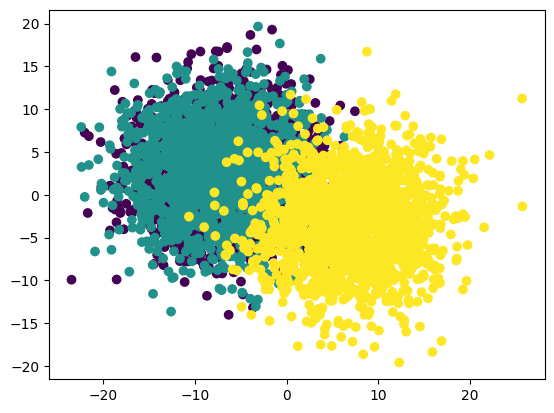

In [ ]:
plt.scatter(df_syn[:,0],df_syn[:,1],c=labels)